#  Visão Computacional e Deep Learning - facenet 1

#### Importando as bibliotecas necessárias

In [2]:
!pip install imageio

In [4]:
!pip install scikit-image

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

from imageio import imread
from skimage.transform import resize
from scipy.spatial import distance
from keras.models import load_model
from sklearn.preprocessing import Normalizer

from mtcnn.mtcnn import MTCNN

%matplotlib inline

Using TensorFlow backend.
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

#### Inicializando variáveis

In [63]:
image_dir_basepath = 'lfw/train/'
names = ['Luiz_Inacio_Lula_da_Silva', 'Angelina_Jolie', 'Bill_Gates','George_W_Bush','Michael_Jordan']
image_size = 160

In [2]:
image_dir_basepath = 'lfw-mini/train/'
names = os.listdir(image_dir_basepath)
image_size = 160

#### Carregando as imagens

In [3]:
image_filepaths = []
for name in names:
    image_dirpath = image_dir_basepath + name
    
    for f in os.listdir(image_dirpath):
        image_filepaths.append(os.path.join(image_dirpath, f))

In [8]:
image_filepaths

['lfw-mini/train/Aaron_Peirsol\\Aaron_Peirsol_0001.jpg',
 'lfw-mini/train/Aaron_Sorkin\\Aaron_Sorkin_0001.jpg',
 'lfw-mini/train/Abdel_Nasser_Assidi\\Abdel_Nasser_Assidi_0001.jpg',
 'lfw-mini/train/Abdoulaye_Wade\\Abdoulaye_Wade_0001.jpg',
 'lfw-mini/train/Abdullah\\Abdullah_0001.jpg',
 'lfw-mini/train/Abdullah_al-Attiyah\\Abdullah_al-Attiyah_0001.jpg',
 'lfw-mini/train/Abdullah_Gul\\Abdullah_Gul_0001.jpg',
 'lfw-mini/train/Abdullatif_Sener\\Abdullatif_Sener_0001.jpg',
 'lfw-mini/train/Abel_Pacheco\\Abel_Pacheco_0001.jpg',
 'lfw-mini/train/Abid_Hamid_Mahmud_Al-Tikriti\\Abid_Hamid_Mahmud_Al-Tikriti_0001.jpg',
 'lfw-mini/train/Adam_Sandler\\Adam_Sandler_0001.jpg',
 'lfw-mini/train/Adam_Scott\\Adam_Scott_0001.jpg',
 'lfw-mini/train/Adel_Al-Jubeir\\Adel_Al-Jubeir_0001.jpg',
 'lfw-mini/train/Adolfo_Aguilar_Zinser\\Adolfo_Aguilar_Zinser_0001.jpg',
 'lfw-mini/train/Adolfo_Rodriguez_Saa\\Adolfo_Rodriguez_Saa_0001.jpg',
 'lfw-mini/train/Adrian_McPherson\\Adrian_McPherson_0001.jpg',
 'lfw-mini/t

#### Visualizando as imagens selecionadas

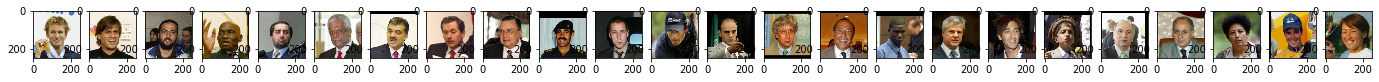

In [8]:
fig, axes = plt.subplots(1, 24, figsize=(24, 24))
i = 0
for item in image_filepaths:
    axes[i].imshow(imread(item))
    i+=1
plt.show()

#### Carregando o modelo do Facenet

In [9]:
model_path = 'model/facenet_keras.h5'
model = load_model(model_path)

W0713 17:52:44.128956  8388 deprecation_wrapper.py:119] From C:\Users\Andre\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 17:52:45.251958  8388 deprecation_wrapper.py:119] From C:\Users\Andre\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 17:52:45.631358  8388 deprecation_wrapper.py:119] From C:\Users\Andre\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 17:52:45.636323  8388 deprecation_wrapper.py:119] From C:\Users\Andre\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0713 17:52:45.640322  8388 deprecation_wrapper.py:119]

#### Carregando o modelo MTCNN para detecção de faces

In [10]:
detector = MTCNN()

#### Faces Detectadas

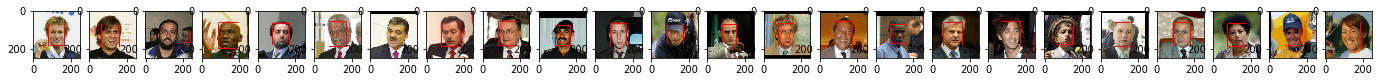

In [11]:
fig, axes = plt.subplots(1, 24, figsize=(24, 24))

i = 0
for filepath in image_filepaths:
    img = imread(filepath)
    faces = detector.detect_faces(img)
    
    if len(faces)>0: #caso foi detectado pelo menos uma face
        (x, y, w, h) = faces[0]['box']
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
        axes[i].imshow(img)
        i+=1

plt.show()

#### Realizando o Crop e Resize nas imagens.

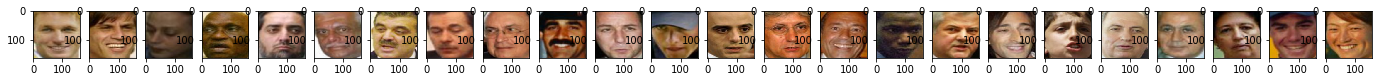

In [12]:
fig, axes = plt.subplots(1, 24, figsize=(24, 24))

i = 0
imgs_faces = []
for filepath in image_filepaths:
    img = imread(filepath)
    faces = detector.detect_faces(img)
    
    if len(faces)>0:
        (x, y, w, h) = faces[0]['box']
        img = img[y:y+h,x:x+w,:]
        img_resized = resize(img, (image_size, image_size), mode='reflect')
        imgs_faces.append(img_resized)
        axes[i].imshow(img_resized)
        i+=1

plt.show()

#### Calculando os Embbedings.

In [15]:
imgs_faces = np.array(imgs_faces)
embs = []
for n in range(0, len(imgs_faces), 1):
    embs.append(model.predict_on_batch(imgs_faces[n:n+1]))

#### Verificando os Embbedings.

In [16]:
print(embs)

[array([[ 0.20322508, -1.3299366 , -1.1649234 ,  1.018002  , -0.32048357,
        -0.09067596,  0.03330622, -0.80922633, -0.23160145, -0.06336305,
         0.31394696, -0.33634046, -0.25318092, -0.23681185, -0.99999654,
        -1.7376468 , -1.0229897 , -0.3084975 , -1.1357661 ,  0.08564766,
        -0.03446851, -0.9246608 ,  1.3780557 , -3.0535629 ,  1.640914  ,
        -0.42361316,  0.15405054, -0.38287526, -0.3819278 ,  2.3912659 ,
         0.15401909, -0.6555203 , -1.085874  ,  0.22131637, -0.34161618,
         1.3518733 , -0.5266483 ,  0.6016484 ,  0.26635844, -1.8781297 ,
         0.59239423,  1.0307294 , -1.081421  , -0.15128395,  0.98333156,
        -0.3620878 ,  0.3916154 ,  1.3589369 , -1.6962428 ,  1.1008128 ,
        -0.72998244, -1.0762647 ,  1.4155358 ,  1.1367575 , -1.5829673 ,
        -1.3369837 , -1.0399693 ,  1.1268171 ,  1.0909953 , -1.1826799 ,
        -0.18807355, -0.42153776, -0.4583033 , -0.4276741 ,  1.1659776 ,
        -1.6007134 , -2.9572132 , -0.81141436, -1.

#### Funções para detecção de face e calculo de embeddings

In [17]:
def carrega_alinha_imagens(filepath):
    img = imread(filepath)
    faces = detector.detect_faces(img)

    (x, y, w, h) = faces[0]['box']
    img = img[y:y+h,x:x+w,:]
    img_alinhada = [resize(img, (image_size, image_size), mode='reflect')]
    
    img_alinhada = np.array(img_alinhada)
    
    return img_alinhada

In [18]:
def calcula_embedding(filepath, batch_size=1):
    img_alinhada = carrega_alinha_imagens(filepath)    
    emb = model.predict_on_batch(img_alinhada[0:1])
    
    return emb

#### Estrutura para imagens e embeddings

In [19]:
dados_imagens = {}
for image_filepath in (image_filepaths):
    name = image_filepath.split('/')[-1].replace('.jpg','')
    dados_imagens[name] = {'image_filepath' : image_filepath,
                           'emb' : calcula_embedding(image_filepath)
                          }

In [20]:
dados_imagens

{'Aaron_Peirsol\\Aaron_Peirsol_0001': {'image_filepath': 'lfw-mini/train/Aaron_Peirsol\\Aaron_Peirsol_0001.jpg',
  'emb': array([[ 0.20322508, -1.3299366 , -1.1649234 ,  1.018002  , -0.32048357,
          -0.09067596,  0.03330622, -0.80922633, -0.23160145, -0.06336305,
           0.31394696, -0.33634046, -0.25318092, -0.23681185, -0.99999654,
          -1.7376468 , -1.0229897 , -0.3084975 , -1.1357661 ,  0.08564766,
          -0.03446851, -0.9246608 ,  1.3780557 , -3.0535629 ,  1.640914  ,
          -0.42361316,  0.15405054, -0.38287526, -0.3819278 ,  2.3912659 ,
           0.15401909, -0.6555203 , -1.085874  ,  0.22131637, -0.34161618,
           1.3518733 , -0.5266483 ,  0.6016484 ,  0.26635844, -1.8781297 ,
           0.59239423,  1.0307294 , -1.081421  , -0.15128395,  0.98333156,
          -0.3620878 ,  0.3916154 ,  1.3589369 , -1.6962428 ,  1.1008128 ,
          -0.72998244, -1.0762647 ,  1.4155358 ,  1.1367575 , -1.5829673 ,
          -1.3369837 , -1.0399693 ,  1.1268171 ,  1.090

In [22]:
for i,v in dados_imagens.items():
    print(i)
    for vi in v.items():
        print(vi)

Aaron_Peirsol\Aaron_Peirsol_0001
('image_filepath', 'lfw-mini/train/Aaron_Peirsol\\Aaron_Peirsol_0001.jpg')
('emb', array([[ 0.20322508, -1.3299366 , -1.1649234 ,  1.018002  , -0.32048357,
        -0.09067596,  0.03330622, -0.80922633, -0.23160145, -0.06336305,
         0.31394696, -0.33634046, -0.25318092, -0.23681185, -0.99999654,
        -1.7376468 , -1.0229897 , -0.3084975 , -1.1357661 ,  0.08564766,
        -0.03446851, -0.9246608 ,  1.3780557 , -3.0535629 ,  1.640914  ,
        -0.42361316,  0.15405054, -0.38287526, -0.3819278 ,  2.3912659 ,
         0.15401909, -0.6555203 , -1.085874  ,  0.22131637, -0.34161618,
         1.3518733 , -0.5266483 ,  0.6016484 ,  0.26635844, -1.8781297 ,
         0.59239423,  1.0307294 , -1.081421  , -0.15128395,  0.98333156,
        -0.3620878 ,  0.3916154 ,  1.3589369 , -1.6962428 ,  1.1008128 ,
        -0.72998244, -1.0762647 ,  1.4155358 ,  1.1367575 , -1.5829673 ,
        -1.3369837 , -1.0399693 ,  1.1268171 ,  1.0909953 , -1.1826799 ,
        

#### Função para impressão e verificação de embeddings

In [23]:
def verifica_emb(img):
    print("Embedding Shape: {}:".format(np.shape(dados_imagens[img]['emb'])))
    print("Embedding: \n{}".format(dados_imagens[img]['emb']))

In [26]:
verifica_emb("Aaron_Peirsol\Aaron_Peirsol_0001")

Embedding Shape: (1, 128):
Embedding: 
[[ 0.20322508 -1.3299366  -1.1649234   1.018002   -0.32048357 -0.09067596
   0.03330622 -0.80922633 -0.23160145 -0.06336305  0.31394696 -0.33634046
  -0.25318092 -0.23681185 -0.99999654 -1.7376468  -1.0229897  -0.3084975
  -1.1357661   0.08564766 -0.03446851 -0.9246608   1.3780557  -3.0535629
   1.640914   -0.42361316  0.15405054 -0.38287526 -0.3819278   2.3912659
   0.15401909 -0.6555203  -1.085874    0.22131637 -0.34161618  1.3518733
  -0.5266483   0.6016484   0.26635844 -1.8781297   0.59239423  1.0307294
  -1.081421   -0.15128395  0.98333156 -0.3620878   0.3916154   1.3589369
  -1.6962428   1.1008128  -0.72998244 -1.0762647   1.4155358   1.1367575
  -1.5829673  -1.3369837  -1.0399693   1.1268171   1.0909953  -1.1826799
  -0.18807355 -0.42153776 -0.4583033  -0.4276741   1.1659776  -1.6007134
  -2.9572132  -0.81141436 -1.2131364  -0.3984289   0.33225042 -0.6124166
  -1.8986365  -1.0449812  -0.5324296  -0.31743854  1.7291638   1.8332665
   2.07264

#### Funções para calculo de distância

In [27]:
def calc_dist(img_name0, img_name1):
    normalize = Normalizer(norm='l2')#normaliza distancia
    emb0 = normalize.transform(dados_imagens[img_name0]['emb'])
    emb1 = normalize.transform(dados_imagens[img_name1]['emb'])
    return distance.euclidean(emb0,emb1)

#### Função para plotagem de imagens

In [28]:
def calc_dist_plot(img_name0, img_name1):
    print("Distance: {}".format(calc_dist(img_name0, img_name1)))
    plt.subplot(1, 2, 1)
    plt.imshow(imread(dados_imagens[img_name0]['image_filepath']))
    plt.subplot(1, 2, 2)
    plt.imshow(imread(dados_imagens[img_name1]['image_filepath']))

#### Comparando Imagens

Distance: 1.356744408607483


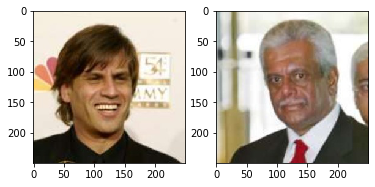

In [29]:
calc_dist_plot("Aaron_Sorkin\Aaron_Sorkin_0001","Abdullah_al-Attiyah\Abdullah_al-Attiyah_0001")

Distance: 1.4557991027832031


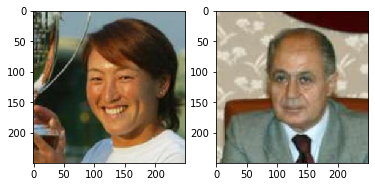

In [30]:
calc_dist_plot("Ai_Sugiyama\Ai_Sugiyama_0001","Ahmet_Necdet_Sezer\Ahmet_Necdet_Sezer_0001")

#### Comparando imagens da mesma pessoa

In [ ]:
calc_dist_plot("Bill_Gates_0001","Bill_Gates_0002")

#### Comparando a mesma imagem

In [ ]:
calc_dist_plot("Bill_Gates_0001","Bill_Gates_0001")